In [35]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math


from pydataset import data

import acquire
import prepare_telco

bring in imports 

In [2]:
## acquire data
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
pd.set_option('display.max_columns', None) # to see all columns

In [3]:
train,validate,test = prepare_telco.prep_telco_data(df) #splitting the data

In [8]:
train,validate,test

(      gender  senior_citizen partner dependents  tenure phone_service  \
 4216    Male               0      No         No      18           Yes   
 1477  Female               1      No         No      29           Yes   
 5752    Male               0      No         No      72           Yes   
 1377    Male               0     Yes        Yes      65           Yes   
 3965  Female               0     Yes        Yes      58           Yes   
 ...      ...             ...     ...        ...     ...           ...   
 4943    Male               1     Yes         No      46           Yes   
 1098  Female               1      No         No      26           Yes   
 3444  Female               0     Yes        Yes      22           Yes   
 1002    Male               0      No        Yes      22           Yes   
 3374    Male               0      No         No       4           Yes   
 
      multiple_lines      online_security        online_backup  \
 4216            Yes                   No   

In [9]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_Male
4216,Male,0,No,No,18,Yes,Yes,No,No,No,No,Yes,No,No,84.30,1537.90,No,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1477,Female,1,No,No,29,Yes,Yes,Yes,Yes,No,No,No,No,Yes,58.55,1718.95,No,Month-to-month,DSL,Bank transfer (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5752,Male,0,No,No,72,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.75,1777.60,No,Two year,None,Bank transfer (automatic),0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1377,Male,0,Yes,Yes,65,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,84.20,5324.50,No,Two year,DSL,Bank transfer (automatic),0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3965,Female,0,Yes,Yes,58,Yes,No,Yes,Yes,No,No,Yes,Yes,No,99.25,5846.65,No,One year,Fiber optic,Credit card (automatic),1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0


In [6]:
train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

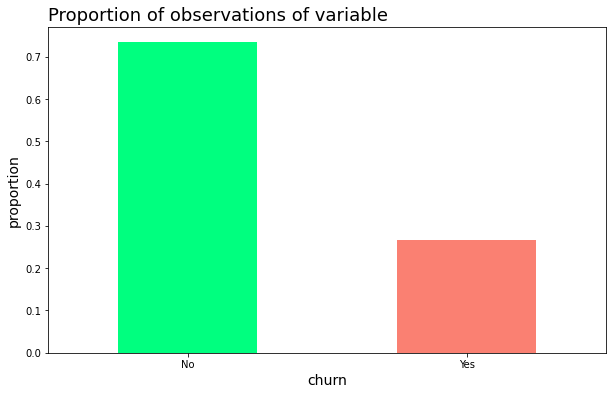

In [41]:
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = train['churn'].value_counts(normalize=True)

# bar plot showing the % of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

ax.set_title('Proportion of observations of variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion',
              fontsize=14)
ax.tick_params(rotation='auto')



this bar chart shows the percentage of observations that correspond to churn

In [42]:
train.shape

(4500, 48)

In [43]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_Male
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.160667,32.472889,64.725044,2289.320233,0.500000,0.483556,0.299333,0.904000,0.589778,0.265778,0.096000,0.421556,0.219556,0.288889,0.219556,0.346444,0.219556,0.347111,0.219556,0.289556,0.219556,0.385778,0.219556,0.387778,0.204000,0.242444,0.438222,0.219556,0.222444,0.332000,0.230000,0.500000
std,0.367264,24.654959,30.209952,2270.394730,0.500056,0.499785,0.458017,0.294624,0.491929,0.441796,0.294624,0.493863,0.413992,0.453297,0.413992,0.475890,0.413992,0.476104,0.413992,0.453607,0.413992,0.486833,0.413992,0.487298,0.403014,0.428609,0.496224,0.413992,0.415934,0.470983,0.420879,0.500056
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,34.775000,385.075000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.200000,1400.575000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,56.000000,90.050000,3845.675000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.650000,8594.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 4216 to 3374
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 4500 non-null   object 
 1   senior_citizen                         4500 non-null   int64  
 2   partner                                4500 non-null   object 
 3   dependents                             4500 non-null   object 
 4   tenure                                 4500 non-null   int64  
 5   phone_service                          4500 non-null   object 
 6   multiple_lines                         4500 non-null   object 
 7   online_security                        4500 non-null   object 
 8   online_backup                          4500 non-null   object 
 9   device_protection                      4500 non-null   object 
 10  tech_support                           4500 non-null   object 
 11  s

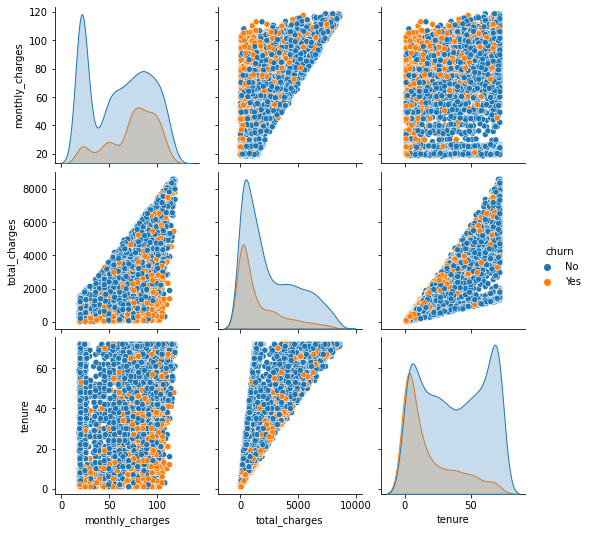

In [56]:
sns.pairplot(train[['monthly_charges', 'total_charges', 'tenure', 'churn']], hue = 'churn')

churn looks to increase when the monthly charges increase

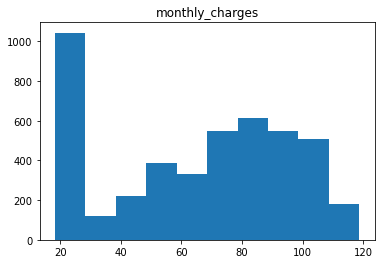

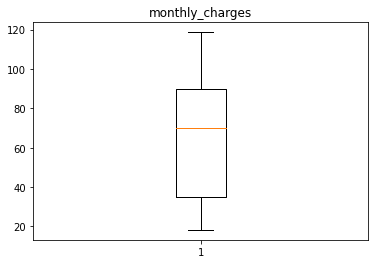

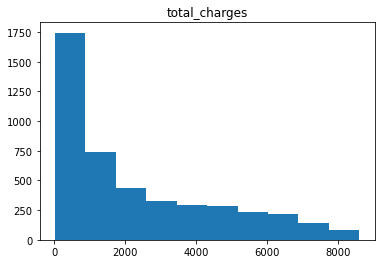

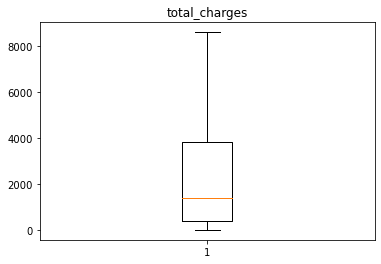

In [45]:
# plot of numeric columns (monthly and total charges)

num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [46]:
train.churn.value_counts()

No     3304
Yes    1196
Name: churn, dtype: int64

In [ ]:
ax1 = sns.catplot(x="gender", kind="count", hue="churn", data=train,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

Contract types:  ['Month-to-month' 'Two year' 'One year']


Text(0.5, 1.0, 'Customers by Contract Type')

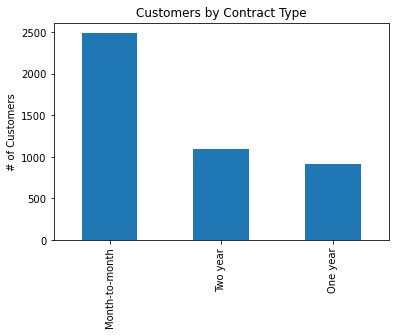

In [47]:

print("Contract types: ",train.contract_type.unique())
ax = train['contract_type'].value_counts().plot(kind = 'bar')
ax.set_ylabel('# of Customers')
ax.set_title('Customers by Contract Type')

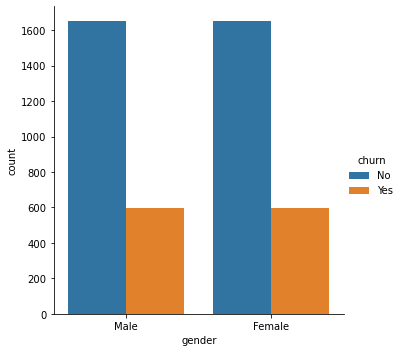

In [48]:
# churn by gender
ax1 = sns.catplot(x="gender", kind="count", hue="churn", data=train,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

it does not appear that gender has much of an affect on churn

drivers of churn: 

internest service type, 
contract type,  
monthly charges


In [58]:

alpha = .05


In [59]:
train['internet_service_type'].value_counts()

Fiber optic    1972
DSL            1540
None            988
Name: internet_service_type, dtype: int64

In [60]:
# the categorical variables i am testing
a = train.internet_service_type
b = train.churn

# H0 - internet service is a driver of churn
# Ha - internet service is not a driver of churn

In [61]:
observed = pd.crosstab(a,b)
observed

churn,No,Yes
internet_service_type,,
DSL,1254,286
Fiber optic,1135,837
None,915,73


In [62]:
# chi2 test on internet service type and churn

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[1254  286]
 [1135  837]
 [ 915   73]]
------------------------
Expected: 

[[1130  409]
 [1447  524]
 [ 725  262]]
------------------------

chi2 = 491.42
p value: 0.0000
We can reject the null hypothesis


we have found with the test that with a low P value that internest service type is related to churn, so it will be one of our variables for modeling.

In [ ]:
train.head()

Text(0.5, 1.0, 'MonthlyCharges vs Churn')

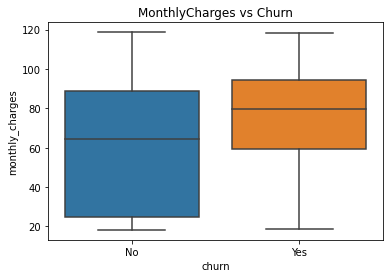

In [63]:
## is there a relationship between monthly charges and churn?
sns.boxplot(train['churn'], train['monthly_charges'])
plt.title('MonthlyCharges vs Churn')

this chart shows that there might be a connection between churn and monthly charges

In [ ]:
train['monthly_charges'].value_counts()

In [ ]:
# the categorical and continous variables i am testing
a2 = train.monthly_charges
b2 = train.churn

# H0 - monthly charges is a driver of churn
# Ha - monthly charges is not a driver of churn

In [ ]:
observed2 = pd.crosstab(a2,b2)
observed2

In [ ]:
# T-test on internet service type and churn

churn_sample = train[train.churn == 'Yes'].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)


In [ ]:
if p/2 > alpha:
    print("We fail to reject null")
elif t < 0:
    print("We fail to reject null")
else:
    print("We reject null")


we will be using monthly charges as well as internet service type in our models 

In [ ]:
# churn by contract type
ax1 = sns.catplot(x="contract_type", kind="count", hue="churn", data=train,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

month to month has a high churn rate so i will use a chi2 test

In [ ]:
# the categorical and continous variables i am testing
a3 = train.contract_type
b3 = train.churn

# H0 - monthly charges is a driver of churn
# Ha - monthly charges is not a driver of churn

In [ ]:
observed3 = pd.crosstab(a3,b3)
observed3

In [ ]:
# chi2 test on internet service type and churn

chi2, p, degf, expected = stats.chi2_contingency(observed3)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

now we will model contract type, internest service type, and monthly charges

Model 1 

Random forest

In [64]:
y_train.value_counts()

0    3304
1    1196
Name: churn_encoded, dtype: int64

In [10]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,gender_Male
4216,Male,0,No,No,18,Yes,Yes,No,No,No,No,Yes,No,No,84.30,1537.90,No,Month-to-month,Fiber optic,Bank transfer (automatic),0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1477,Female,1,No,No,29,Yes,Yes,Yes,Yes,No,No,No,No,Yes,58.55,1718.95,No,Month-to-month,DSL,Bank transfer (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5752,Male,0,No,No,72,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.75,1777.60,No,Two year,None,Bank transfer (automatic),0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1377,Male,0,Yes,Yes,65,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,84.20,5324.50,No,Two year,DSL,Bank transfer (automatic),0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3965,Female,0,Yes,Yes,58,Yes,No,Yes,Yes,No,No,Yes,Yes,No,99.25,5846.65,No,One year,Fiber optic,Credit card (automatic),1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0


In [65]:
# baseline
baseline = y_train.mode()

matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.73


In [66]:
x_vars = ['contract_type_One year','contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'monthly_charges']
y_vars = 'churn_encoded'

X_train, y_train = train[x_vars], train[y_vars]
X_validate, y_validate = validate[x_vars], validate[y_vars]
X_test, y_test = test[x_vars], test[y_vars]

In [67]:
X_train.head()

,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,monthly_charges
4216,0,0,1,0,84.30
1477,0,0,0,0,58.55
5752,0,1,0,1,24.75
1377,0,1,0,0,84.20
3965,1,0,1,0,99.25


In [68]:
forest1 = RandomForestClassifier(max_depth=3, random_state=123)

forest1.fit(X_train, y_train)
y_predictions = forest1.predict(X_train)

report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 3")
pd.DataFrame(report)

Tree of depth 3


,0,1,accuracy,macro avg,weighted avg
precision,0.793058,0.603293,0.764889,0.698176,0.742623
recall,0.919794,0.336957,0.764889,0.628375,0.764889
f1-score,0.851738,0.432403,0.764889,0.642071,0.740288
support,3304.000000,1196.000000,0.764889,4500.000000,4500.000000


In [28]:
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,3039,793
1,265,403


In [29]:
# 1 is positive and 0 is negative

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(403, 3039, 265, 793)

In [30]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

Accuracy: 0.7648888888888888


In [31]:
# loops

for i in range(2, 11):
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    forest = forest.fit(X_train, y_train)

    y_predictions = forest.predict(X_train)

    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0       1  accuracy    macro avg  weighted avg
precision     0.734222     0.0  0.734222     0.367111      0.539082
recall        1.000000     0.0  0.734222     0.500000      0.734222
f1-score      0.846745     0.0  0.734222     0.423373      0.621699
support    3304.000000  1196.0  0.734222  4500.000000   4500.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.793058     0.603293  0.764889     0.698176      0.742623
recall        0.919794     0.336957  0.764889     0.628375      0.764889
f1-score      0.851738     0.432403  0.764889     0.642071      0.740288
support    3304.000000  1196.000000  0.764889  4500.000000   4500.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.851783     0.563137      0.77     0.707460      0.775067
recall        0.831416     0.600334      0.77     0.715875      0.770000

In [32]:
# compare in sample to out of sample 

metrics = []

for i in range(2, 25):
    forest = RandomForestClassifier(max_depth=i, random_state=123)
    forest = forest.fit(X_train, y_train)

    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734222,0.734222,0.000000
1,3,0.764889,0.733333,0.031556
2,4,0.770000,0.752000,0.018000
3,5,0.770000,0.752000,0.018000
4,6,0.778000,0.739556,0.038444
5,7,0.783333,0.740444,0.042889
6,8,0.791333,0.734222,0.057111
7,9,0.802889,0.729778,0.073111
8,10,0.814222,0.735111,0.079111
9,11,0.828889,0.726222,0.102667


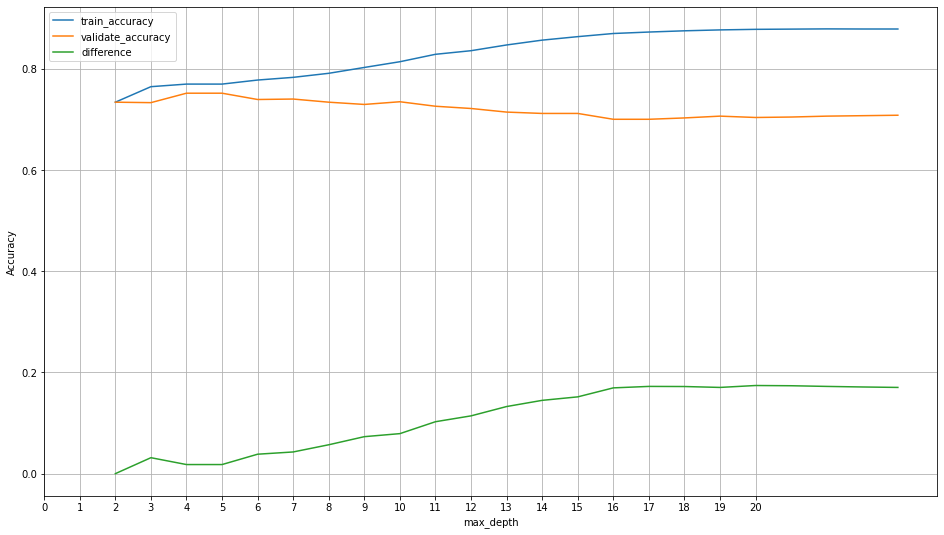

In [33]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

Model 2

Decision Tree

Baseline = 0.73

In [22]:
X_train.head()

,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,monthly_charges
4216,0,0,1,0,84.30
1477,0,0,0,0,58.55
5752,0,1,0,1,24.75
1377,0,1,0,0,84.20
3965,1,0,1,0,99.25


In [23]:
y_train[:5]

4216    No
1477    No
5752    No
1377    No
3965    No
Name: churn, dtype: object

In [36]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

tree1 = tree1.fit(X_train, y_train)

y_predictions = tree1.predict(X_train)

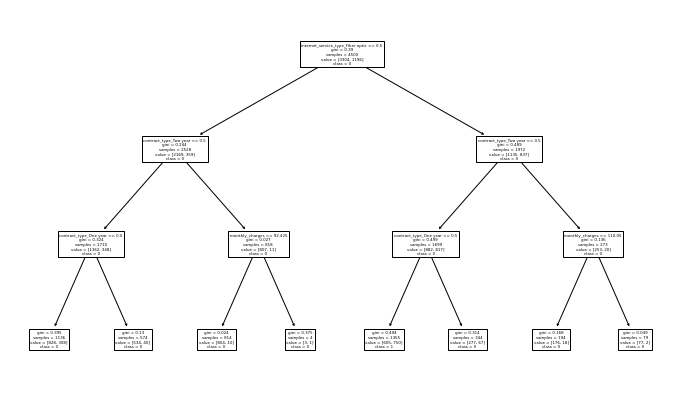

In [37]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [38]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.77


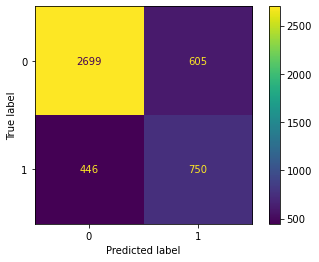

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree1, X_train, y_train)

Model 3

Logistic regression

In [52]:
logit = LogisticRegression(random_state=123)

features = ['contract_type_One year','contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'monthly_charges']

logit.fit(X_train[features], y_train)
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.77


In [54]:
## using validate 

features = ['contract_type_One year','contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'monthly_charges']

y_pred = logit.predict(X_validate[features])

print('Logit1 model using contract type, internet service, monthly charges')
print(classification_report(y_validate, y_pred))

Logit1 model using contract type, internet service, monthly charges
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       826
           1       0.53      0.56      0.54       299

    accuracy                           0.75      1125
   macro avg       0.68      0.69      0.69      1125
weighted avg       0.75      0.75      0.75      1125

